#### Week 4 Assignment 
##### Michael Perrine
##### DSC 550
##### Professor Werner

# Vehicle MPG Analysis

## Introduction

The purpose of this analysis is to predict miles per gallon (mpg) for several vehicle types. In order to accomplish this I will construct a regression analysis. Before I can get to the regression I will need to transform the data. There are variables that will need to be adjusted or removed. In addition I will need to perform some exploratory analysis to better understand the data. This will help to get a holistic view of the data and provide a better analysis.

1. The first step is to import the libraries for my analysis. For the analysis I will use several python libraries such as pandas, numpy, matplotlib, and seaborn. I will import pandas to manipulate the data frame. Numpy is used to perform mathematical calculations. Matplotlib and seaborn are used for data presentation and visualization.

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

2. The next step is to import the dataset. The dataset for my analysis originates from Kaggle. Kaggle is a data science website that collects data from a variety of sources. The dataset originated from the Carnegie Mellon University and was used in the 1983 American Statistical Association Exposition(kaggle). Once the data is imported it is necessary to verify the data imported properly. We do this by viewing the first 5 rows of the dataset. 

In [3]:
# Import data set
car = pd.read_csv("auto-mpg.csv")
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


3. After the data is uploaded I can begin viewing the data set. First I need to remove the car name column. The next step is to view the data types. I noticed the horsepower data is an object and should be an integer. I will need to change the data type of that column. After I change the horsepower data type I want to make sure there are no missing values in the data set. Finally I will create dummy variables for the horsepower column.

In [4]:
del car["car name"]

In [5]:
# this code shows the data types 
car.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [6]:
# This code will check for any null values 
car.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [7]:
# This code converts the horsepower column from an object data type to a number 
car["horsepower"] = pd.to_numeric(car["horsepower"], errors='coerce').fillna(0).astype(int)


In [8]:
car["horsepower"]

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: int64

In [9]:
# This code views the data types and validates the conversion of the horsepower column from an object to an integer
car.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [10]:
# This code creates dummy variables for the horsepower category
car_1 = pd.get_dummies(car, columns=["horsepower"], dtype=int)
car_1.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_0,horsepower_46,horsepower_48,...,horsepower_190,horsepower_193,horsepower_198,horsepower_200,horsepower_208,horsepower_210,horsepower_215,horsepower_220,horsepower_225,horsepower_230
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4. Now that I've had the opportunity to make transformations It's time to start looking for relationships in the data. There are different ways to accomplish this. We can create a confusion matrix or we can create some visualizations. I chose to write a for loop to create visualizations. I want to understand if a relationship exists between MPG and the other variables. After reviewing the data I can identify a relationship with the variables. Some relationships are stronger such as displacement, horsepower, and weight. 



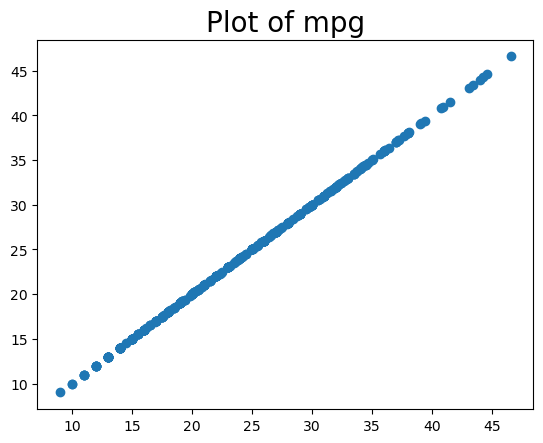

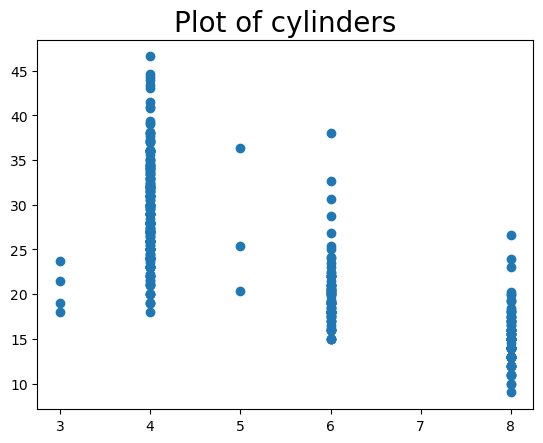

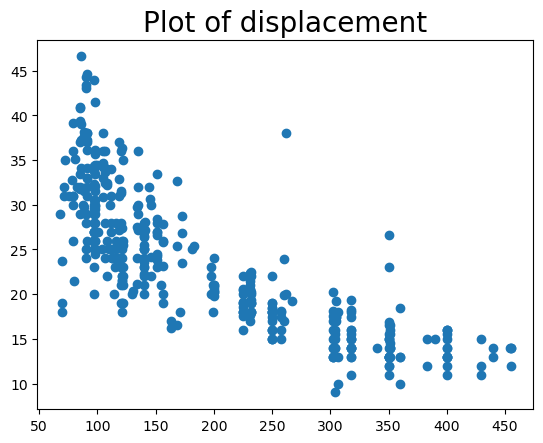

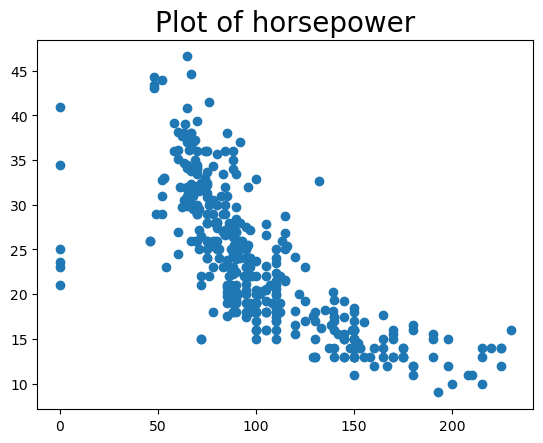

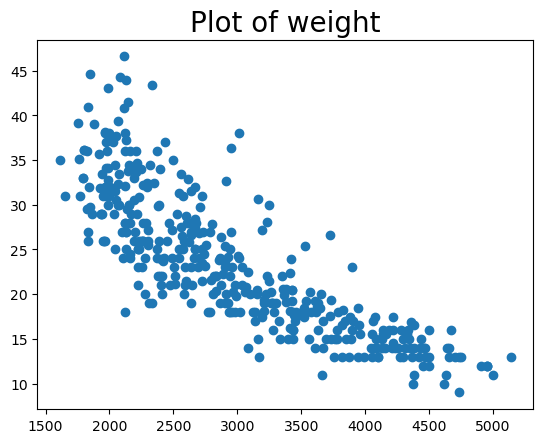

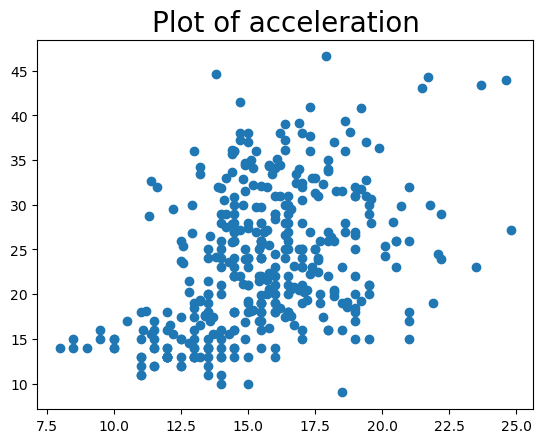

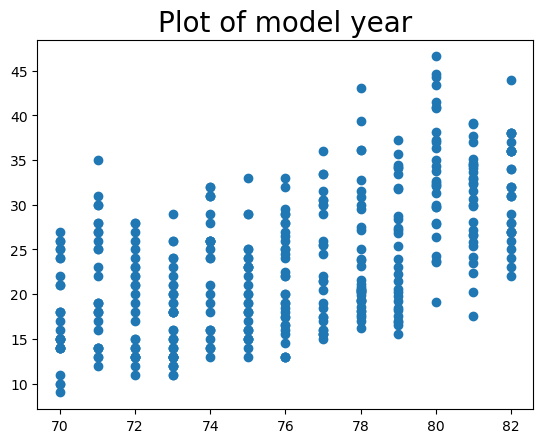

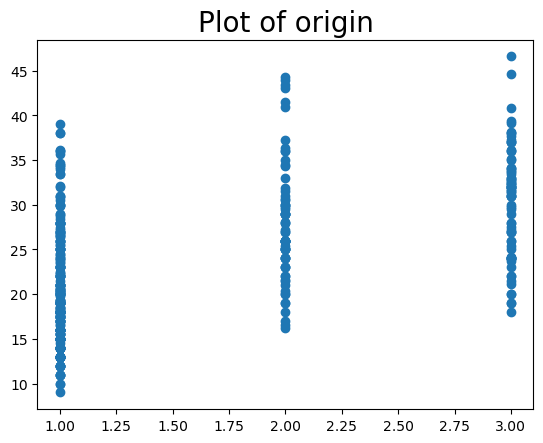

In [11]:

for p in car.columns:
    plt.title("Plot of "+p, fontsize = 20 )
    plt.scatter(x = car[p], y = car["mpg"] )
    plt.show()

5. One relationship of interest is weight. How does this variable affect MPG? I created a graph to illustrate this connection. As we review this variable we see a strong relationship between the two variables. The more a vehicle weighs the more it affects MPG. This shows that individuals that own heavy vehicles will have to spend more on fuel than others.

Text(33.37500000000001, 0.5, 'MPG')

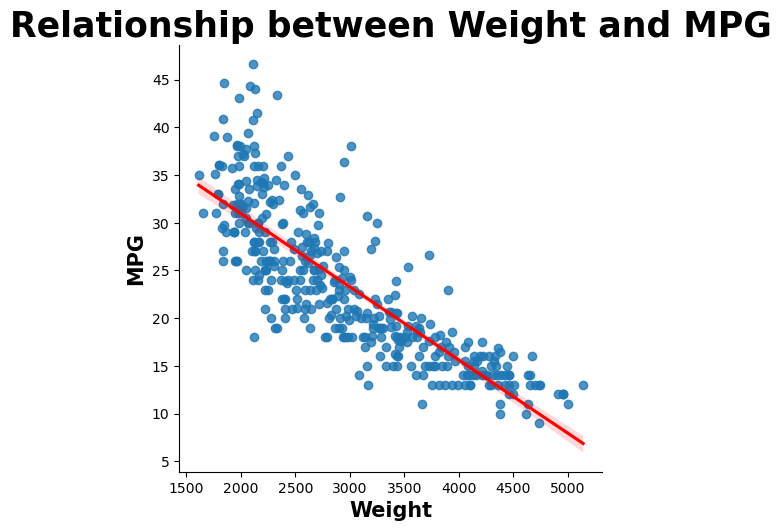

In [12]:
# This code builds a scatter plot for weight vs mpg

sns.lmplot(x= "weight", y = "mpg", data = car_1, line_kws={"color":"red"} )
plt.title("Relationship between Weight and MPG", fontsize= 25, weight="bold")
plt.xlabel("Weight", fontsize = 15, weight = "bold")
plt.ylabel("MPG", fontsize = 15, weight = "bold")



6. Before I can begin my regression analysis, I need to split my data into a training set and a test set. In addition I need to identify the target variable. 

In [13]:
# This code creates the target variable and splits the data into a training and a test set with an 80/20 split
X = car_1.drop("mpg", axis=1)
y = car_1["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=25 )

In [14]:
# This code gives the dimension of the X_train set
X_train.shape

(318, 100)

6a. Now we can run our regression model. I chose to run a multiple linear regression. The following lines of code produces my linear regression

In [15]:
# This code imports the linear regression into python
lr = LinearRegression()

In [16]:
# This code imports the data into my regression model
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# This code predicts the Y value based on the X_test
y_pred = lr.predict(X_test)

In [ ]:
# This code predicts the Y value based on the X_train
y_pred_X = lr.predict(X_train)

In [ ]:
# This code calculates the mae for the testing set
mae = mean_absolute_error(y_test, y_pred)
mae

2.5389419922638155

In [ ]:
# This code calculates the mae for the training set
mae_X = mean_absolute_error(y_train, y_pred_X)
mae_X

1.6267456184002458

In [ ]:
# This code calculates the mse for the testing set
mse = mean_squared_error(y_test,y_pred)
mse

11.729078791481376

In [ ]:
# This code calculates the mse for the training set
mse_X = mean_squared_error(y_train, y_pred_X)
mse_X

5.718980294457949

In [ ]:
# This code calculates the R-squared for the testing set
r_2 = r2_score(y_test,y_pred)
r_2

0.8167563356593717

In [ ]:
# This code calculates the R-squared for the training set
r_2_X = r2_score(y_train, y_pred_X)
r_2_X

0.9042735550428599

6a.1 The multiple regression gives some interesting information. I ran the mse, mae, and r2 for both the training and testing data. Overall the testing data performed well. The testing data scored higher than the training data which was expected however the data didn't stray too far from the training set. The largest discrepancy is the mse. One possible reason for this can reside in outliers. If the testing set had larger outliers than squaring them will result in a larger mse. One thing to note is the R- squared. the R-squared for the testing set is 0.82 and the R-squared for the training set is 0.90. This close R-square shows the model is a good fit for the data

6b. I want to run a second model using the Lasso regression model. The goal is to see if this model produces a better result than the regression model.

In [ ]:
# This code scales the data and removes zero coefficients from the data set
scaler = StandardScaler() 

In [ ]:
# This code transforms the training set for the lasso regression
X_train = scaler.fit_transform(X_train)

In [ ]:
# This code transforms the testing set for the lasso regression
X_test = scaler.fit_transform(X_test)

In [ ]:
# This code sets up the lasso regression
lasso = Lasso()

In [ ]:
# This code imports the data into my regression model
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
# This code predicts the Y value based on the X_test
y_pred_1 = lasso.predict(X_test)

In [ ]:
# This code predicts the Y value based on the X_train
l_mae = mean_absolute_error(y_test, y_pred_1)
l_mae

2.946897208969438

In [ ]:
# This code calculates the mse for the testing set
l_mse = mean_squared_error(y_test,y_pred_1)
l_mse

17.17422944959273

In [ ]:
# This code calculates the R-squared for the testing set
l_r2 = r2_score(y_test,y_pred_1)
l_r2

0.7316866232618571

In [ ]:
# This code creates tuning parameters to determine the best alpha for the regression model
param_grid = {
    
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    
}

In [ ]:
# This code adds the parameter grid to the regression model
lasso_cv = GridSearchCV(lasso, param_grid, cv = 3, n_jobs= -1)

In [ ]:
# This code fits the parameters to the model
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [ ]:
# This code predicts the Y value based on the new param for X_test
y_pred_2 = lasso_cv.predict(X_test)


In [ ]:
# This code predicts the Y value based on the new param for X_train
y_pred_X_2 = lasso_cv.predict(X_train)

In [ ]:
# This code produces the mae with the new predictor value for the testing set
l_mae_lasso = mean_absolute_error(y_test, y_pred_2)
l_mae_lasso

2.5549767324767467

In [ ]:
# This code produces the mae with the new predictor value for the training set
l_mae_lasso_X = mean_absolute_error(y_train, y_pred_X_2)
l_mae_lasso_X

1.8614136991691381

In [52]:
# This code produces the mse with the new predictor value for the testing set
l_mse_lasso = mean_squared_error(y_test,y_pred_2)
l_mse_lasso

11.847445638981142

In [ ]:
# This code produces the mse with the new predictor value for the training set
l_mse_lasso_X = mean_squared_error(y_train, y_pred_X_2)
l_mse_lasso_X

6.4856629661065615

In [ ]:
# This code calculates the R-squared for the testing set
l_r2_lasso = r2_score(y_test,y_pred_2)
l_r2_lasso

0.814907087712631

In [ ]:
# This code calculates the R-squared for the training set
l_r2_lasso_X = r2_score(y_train, y_pred_X_2)
l_r2_lasso_X

0.8914405318834191

In [ ]:
# This code displays the best estimator for the lasso regression
lasso_cv.best_estimator_

Lasso(alpha=0.1)

6b-1. After running the Lasso regression model I noticed the mse, mae, and the R-squared yielded similar results. I also calculated the best alpha at 0.1. Although the results are similar between the two models it was worth running the analysis to validate the model results 